In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
from numpy import linalg as LA

import mplcyberpunk

plt.style.use('cyberpunk')

In [2]:
ativos = ['WEGE3.SA', 'PCAR3.SA', 'LREN3.SA', 'PETR4.SA', 'VALE3.SA']

dataInicial = dt.datetime.now() - dt.timedelta(300)
dataFinal = dt.datetime.now()

cotacoes = yf.download(ativos, dataInicial, dataFinal)['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [3]:
retornos = cotacoes.pct_change().dropna()
mediaRetornos = retornos.mean()
matrizCovariancia = retornos.cov()
pesosCarteira = np.full(len(ativos), 1/len(ativos))
numeroAcoes = len(ativos)

pesosCarteira

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [4]:
numeroSimulacoes = 10000
diasProjetados = 252
capitalInicial = 1000

In [5]:
retornoMedio = retornos.mean(axis=0).to_numpy()
matrizRetornoMedio = retornoMedio * np.ones(shape = (diasProjetados, numeroAcoes))

In [6]:
L = LA.cholesky(matrizCovariancia)
L

array([[0.03230062, 0.        , 0.        , 0.        , 0.        ],
       [0.01432238, 0.02722125, 0.        , 0.        , 0.        ],
       [0.00618037, 0.00793273, 0.02445561, 0.        , 0.        ],
       [0.00235011, 0.00057501, 0.00415533, 0.02141484, 0.        ],
       [0.00739082, 0.00221316, 0.00079432, 0.00334415, 0.01640356]])

In [7]:
retornosCarteira = np.zeros([diasProjetados, numeroSimulacoes])
montanteFinal = np.zeros(numeroSimulacoes)

for i in range(numeroSimulacoes):
    
    Rpdf = np.random.normal(size= [diasProjetados,numeroAcoes])
    
    retornoSintetico = matrizRetornoMedio + np.inner(Rpdf, L)

    retornosCarteira[:,i] = np.cumprod(np.inner(pesosCarteira, retornoSintetico) + 1) * capitalInicial
    
    montanteFinal[i] = retornosCarteira[-1, i]
    
retornosCarteira

array([[ 994.14324475, 1005.3681301 , 1006.19819009, ...,  978.10110256,
        1032.61711169,  971.34225065],
       [ 993.84014209, 1015.97201438, 1027.74592938, ..., 1019.9498583 ,
        1030.22967569,  992.40845118],
       [ 963.79616241,  996.12415964, 1030.94330104, ..., 1028.70890711,
        1027.32271419, 1012.01665178],
       ...,
       [1338.59711354,  993.35286298,  712.9152437 , ...,  927.66142982,
         939.36605712, 1519.50643837],
       [1368.78451531,  995.17581526,  703.63766875, ...,  945.09137934,
         948.09494911, 1552.65387332],
       [1407.21195272,  994.0831927 ,  713.67073734, ...,  945.80631862,
         972.74659052, 1546.0738836 ]])

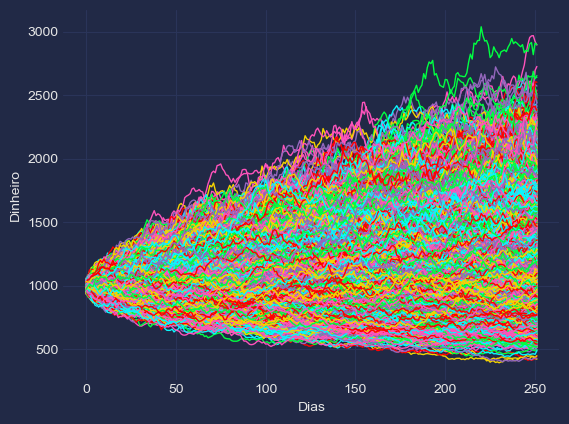

In [8]:
plt.plot(retornosCarteira, linewidth=1)
plt.xlabel('Dias')
plt.ylabel('Dinheiro')
plt.show()

In [9]:
montante99 = str(np.percentile(montanteFinal, 1))
montante95 = str(np.percentile(montanteFinal, 5))
montanteMediano = str(np.percentile(montanteFinal, 50))
cenariosComLucro = str((len(montanteFinal[montanteFinal > 1000])/len(montanteFinal)) * 100) + '%'

In [10]:
print(f'''Ao investir R$ 1000,00 na carteira {ativos}, 
podemos esperar esses resultados para os próximo ano, 
utilizando o método de Monte Carlo com 10 mil simulações:

Com 50% de probabilidade, o montante será maior que R$ {montanteMediano}. 

Com 95% de probabilidade, o montante será maior que R$ {montante95}.

Com 99% de probabilidade, o montante será maior que R$ {montante99}.

Em {cenariosComLucro} dos cenários, foi possível obter lucro no próximo ano.''')

Ao investir R$ 1000,00 na carteira ['WEGE3.SA', 'PCAR3.SA', 'LREN3.SA', 'PETR4.SA', 'VALE3.SA'], 
podemos esperar esses resultados para os próximo ano, 
utilizando o método de Monte Carlo com 10 mil simulações:

Com 50% de probabilidade, o montante será maior que R$ 1162.5006420380587. 

Com 95% de probabilidade, o montante será maior que R$ 751.2228934314113.

Com 99% de probabilidade, o montante será maior que R$ 623.4401501888368.

Em 71.67% dos cenários, foi possível obter lucro no próximo ano.


In [11]:
var99 = float(montante99)/1000 -1
var95 = float(montante95)/1000 -1
var50 = float(montanteMediano)/100 -1


print(var99)
print(var95)
print(var50)

-0.3765598498111632
-0.24877710656858865
10.625006420380586


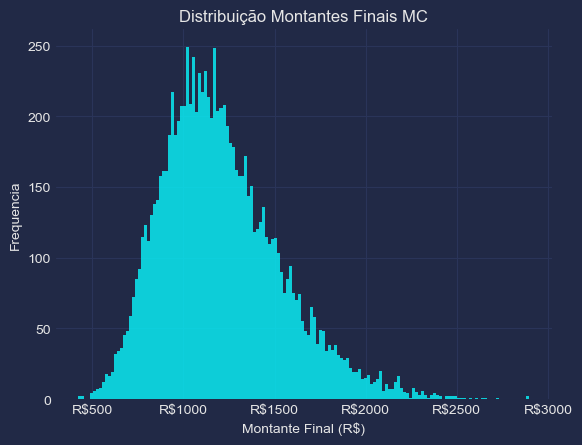

In [12]:
config = dict(histtype = "stepfilled", alpha = 0.8, density = False, bins = 150)
fig, ax = plt.subplots()
ax.hist(montanteFinal, **config)
ax.xaxis.set_major_formatter('R${x:.0f}')
plt.title('Distribuição Montantes Finais MC')
plt.xlabel('Montante Final (R$)')
plt.ylabel('Frequencia')


plt.show()